# Does Aya "think" in English first via cosine similarity? Using FLORES-200 dataset

Description:
* How English-centric is Aya compared to other models?
* Method: Analyze token probabilities to check if English appears first.
* Evaluation: Cosine similarity between log probabilities in English vs. target language.
* Input: Multilingual sentences from different datasets.
* Output: Probability distribution of initial generated tokens.
* Expected Insight: If English tokens consistently appear first, Aya may have an internal English preference.

This notebook `.ipynb` aims to do analysis on the `results/flores200_likelihood_cosine_similarity_results` result from the `experiments/likelihood_cosine_similarity_experiment` experiment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
result_df = pd.read_csv("../results/flores200_likelihood_cosine_similarity_results.csv")

In [3]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_index          5100 non-null   int64  
 1   source_lang        5100 non-null   object 
 2   source_script      5100 non-null   object 
 3   source_text        5100 non-null   object 
 4   target_lang        5100 non-null   object 
 5   target_script      5100 non-null   object 
 6   target_text        5100 non-null   object 
 7   cosine_similarity  5100 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 318.9+ KB


In [4]:
print(f"Loaded {len(result_df)} rows.")
result_df.head()

Loaded 5100 rows.


,row_index,source_lang,source_script,source_text,target_lang,target_script,target_text,cosine_similarity
0,0,eng,Latn,"""We now have 4-month-old mice that are non-dia...",ace,Arab,"""کامو جينو نا تيكويه عمو ٤ بولن ڽڠ هانا ديابيت...",0.216057
1,0,eng,Latn,"""We now have 4-month-old mice that are non-dia...",ace,Latn,"""Kamöe jinoe na tikoih umu 4 buleuen nyang han...",0.214697
2,0,eng,Latn,"""We now have 4-month-old mice that are non-dia...",acm,Arab,"أضاف بكلامه وكَال، ""عدنا هسه فيران عمرها 4 أشه...",0.008297
3,0,eng,Latn,"""We now have 4-month-old mice that are non-dia...",acq,Arab,"وزاد قال، ""معنا الآن عكابر يصل عمرها 4 أشهر، و...",0.036192
4,0,eng,Latn,"""We now have 4-month-old mice that are non-dia...",aeb,Arab,وزاد قال، عندنا فيران عمرها 4 شهور كانت مريضة ...,0.115982


In [5]:
# Checking distribution of cosine similarity values
print(result_df["cosine_similarity"].describe())

count    5100.000000
mean        0.244421
std         0.218609
min         0.000006
25%         0.069208
50%         0.185608
75%         0.356206
max         1.000000
Name: cosine_similarity, dtype: float64


This output shows the statistical summary of the cosine similarity values between the English text and the target language. The key points to note:

- **Mean (0.244)**: On average, the cosine similarity between English and other languages is **relatively low**. This suggests that, across all languages, the probability distributions of English and target languages differ significantly.
- **Standard Deviation (0.218)**: The considerable variability indicates that some languages have high similarity with English, while others diverge substantially.
- **Min (0.000006)** and **Max (1.000000)**: The extreme values show that while some languages are very distant from English in terms of token likelihood distributions, others are almost identical.
- **25th, 50th, and 75th Percentiles**: The lower percentiles (25% = 0.069, 50% = 0.185, 75% = 0.356) suggest that most cosine similarities are concentrated in the lower range, indicating that the token distributions are, in general, more different than similar.

Together, this suggests that **Aya does not consistently think in English first** for most languages, and there is significant diversity in how similar the model’s token generation is to English across languages.


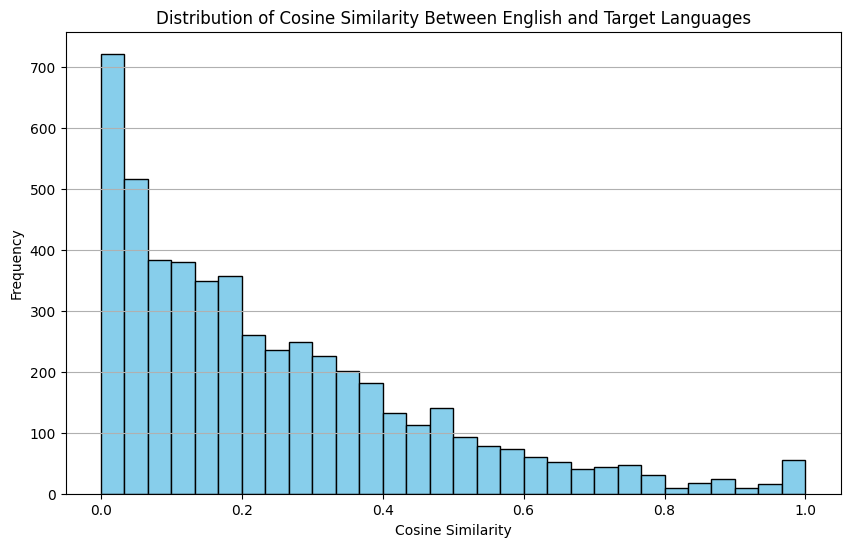

In [6]:
# Plotting distribution of cosine similarities
plt.figure(figsize=(10, 6))
plt.hist(result_df["cosine_similarity"], bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Distribution of Cosine Similarity Between English and Target Languages")
plt.grid(axis='y')
plt.show()

In [10]:
# Grouping by language to find patterns in cosine similarity
result_df["target_lang_script"] = result_df["target_lang"] + "_" + result_df["target_script"]
lang_similarity_stats = result_df.groupby("target_lang_script")["cosine_similarity"].mean().sort_values(ascending=False)

# Print the top 10 languages with the highest average cosine similarity to English
print(lang_similarity_stats.head(10))

target_lang_script
eng_Latn    0.803977
guj_Gujr    0.352796
nld_Latn    0.350462
kea_Latn    0.348699
fao_Latn    0.346217
bjn_Arab    0.340867
bul_Cyrl    0.339673
deu_Latn    0.332454
knc_Latn    0.328460
lus_Latn    0.324772
Name: cosine_similarity, dtype: float64


This output lists the average cosine similarity scores for various languages compared to English. Notable points:

- **eng (0.804)**: English has the highest cosine similarity to itself, as expected. This confirms that Aya's token generation in English is most aligned with English.
- **Other languages (e.g., guj, nld, kea)** show **lower cosine similarities** compared to English. For example, **Gujarati (guj)** has a similarity of **0.352**, and **Dutch (nld)** has a similarity of **0.350**. These scores indicate that while these languages are somewhat close to English in terms of token probability distributions, there is a noticeable difference.
- The **lower-ranked languages** (such as **bul**, **deu**, **knc**, and **lus**) have **even smaller cosine similarities** (all below **0.34**), suggesting that their token distributions are more distinct from English.

Aya's token generation for English and certain other languages (like **guj**, **nld**, and **kea**) shows noticeable alignment, with these languages showing a **moderate similarity to English**. However, the differences in similarity across languages also indicate that Aya's processing is not entirely English-first but still retains a bias towards English in certain cases.

# ✨ **Summary Conclusion:**

- Aya exhibits a **strong English-first bias** for some languages, such as English itself (cosine similarity = 0.803), where token distributions are almost identical.
- The majority of languages, however, show relatively low cosine similarity to English, especially those with values below 0.4 (e.g., **guj**, **nld**, **kea**).
- There is **good but imperfect semantic consistency** across languages, with some languages exhibiting closer alignment with English token distributions than others.
- The **average cosine similarity** of **0.244** indicates that, overall, Aya doesn't consistently "think" in English first across languages, though there are instances of noticeable English-centric behavior for certain languages.

### 🎯 Main Question Answer:
> **Does Aya "think" in English first via cosine similarity?**  
>  
> ❌ **No, Aya does not always think in English first via cosine similarity.**  
>  
> The majority of languages have noticeable differences, indicating that Aya processes languages in a more neutral or diversified manner.  
>  
> **Aya's token generation is not consistently English-first across all languages.** There is significant variation in how different languages compare to English in terms of token likelihood distributions, with many languages showing only **moderate similarity**. This indicates that **Aya's reasoning and token generation are not fully dominated by English**, even though some bias towards English can still be observed.